In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from stl import mesh
import pandas as pd
from scipy.spatial import Delaunay
from skimage import measure

In [3]:
def numpy_to_stl(vertices, faces, filename):
    """
    Convierte un arreglo de NumPy a un archivo STL.
    
    :param vertices: Un arreglo de NumPy con las coordenadas de los vértices.
    :param faces: Un arreglo de NumPy con los índices de los vértices que forman las caras.
    :param filename: El nombre del archivo STL a crear.
    """
    # Crear la malla
    mesh_data = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))

    for i, face in enumerate(faces):
        for j in range(3):
            mesh_data.vectors[i][j] = vertices[face[j], :]

    # Guardar el archivo STL
    mesh_data.save(filename)

# Ejemplo de uso:
# Define los vértices de un prisma rectangular
vertices = np.array([
    [0.0, 0.0, 0.0],  # Vértice 0
    [1.0, 0.0, 0.0],  # Vértice 1
    [1.0, 1.0, 0.0],  # Vértice 2
    [0.0, 1.0, 0.0],  # Vértice 3
    [0.0, 0.0, 1.0],  # Vértice 4
    [1.0, 0.0, 1.0],  # Vértice 5
    [1.0, 1.0, 1.0],  # Vértice 6
    [0.0, 1.0, 1.0]   # Vértice 7
])

# Define las caras del prisma (cada cara se define por 2 triángulos)
faces = np.array([
    [0, 1, 2], [0, 2, 3],  # Cara inferior
    [4, 5, 6], [4, 6, 7],  # Cara superior
    [0, 1, 5], [0, 5, 4],  # Cara frontal
    [1, 2, 6], [1, 6, 5],  # Cara derecha
    [2, 3, 7], [2, 7, 6],  # Cara trasera
    [3, 0, 4], [3, 4, 7]   # Cara izquierda
])

# Llama a la función
numpy_to_stl(vertices, faces, 'prisma.stl')

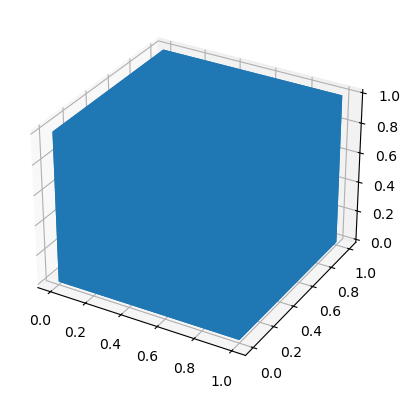

In [4]:
from stl import mesh
from mpl_toolkits import mplot3d
from matplotlib import pyplot

# Create a new plot
figure = pyplot.figure()
axes = figure.add_subplot(projection='3d')

# Load the STL files and add the vectors to the plot
your_mesh = mesh.Mesh.from_file('prisma.stl')
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(your_mesh.vectors))

# Auto scale to the mesh size
scale = your_mesh.points.flatten()
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
pyplot.show()